In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_clean.csv")
df.head

<bound method NDFrame.head of          Series 1
0     2397.167568
1     2371.333300
2     2573.025408
3             NaN
4     2574.872476
...           ...
2512          NaN
2513  -999.167188
2514 -1018.355861
2515 -1013.176196
2516 -1029.957310

[2517 rows x 1 columns]>

<AxesSubplot:>

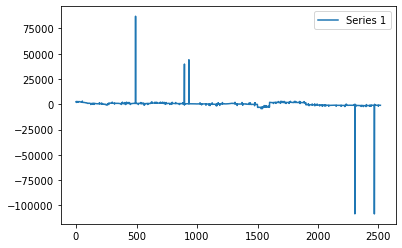

In [6]:
df = df.dropna()
df.plot()

<AxesSubplot:>

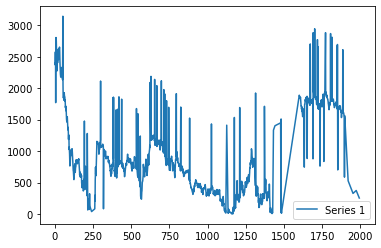

In [33]:
df2 = df[df.values < 10000 ]
df3 = df2[df2.values > 0]
# df3.to_csv("partial_clean2.csv")
df3.plot()

<AxesSubplot:>

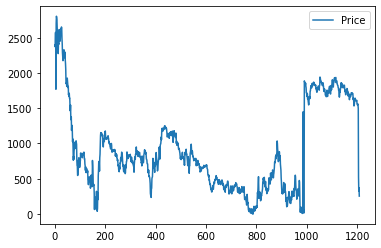

In [35]:
dfcleaned = pd.read_csv("partial_clean.csv")
dfcleaned.plot()

In [31]:
# Remove large spikes
def detect_outlier_position_by_fft(signal, threshold_freq=0.1,
                                   frequency_amplitude=.001):
    signal = signal.copy()
    fft_of_signal = np.fft.fft(signal)
    outlier = np.max(signal) if abs(np.max(signal)) > abs(np.min(signal)) else np.min(signal)
    if np.any(np.abs(fft_of_signal[round(threshold_freq):]) > frequency_amplitude):
        index_of_outlier = np.where(signal == outlier)
        return index_of_outlier[0]
    else:
        return None

y = df3.values
outlier_idx = []

opt = dict(threshold_freq=0.01, frequency_amplitude=0.001)

win = 20
for k in range(win*2, y.size, win):
    idx = detect_outlier_position_by_fft(y[k-win:k+win], **opt)
    if idx is not None:
        outlier_idx.append(k + idx[0] - win)
outlier_idx = list(set(outlier_idx))

fig, ax = plt.subplots(figsize=(7, 2.75))

print(outlier_idx)
for i in range(len(outlier_idx)):
    print(df3[outlier_idx[i]])

df3.plot()
df3[outlier_idx].plot(**kw)
_ = ax.set_ylim(-50, 50)

[896, 771, 1027, 1159, 525, 270, 914, 147, 668, 1184, 932, 807, 1065, 298, 43, 300, 941, 691, 565, 438, 185, 442, 827, 60, 1217, 1093, 714, 204, 588, 1101, 463, 336, 851, 85, 983, 220, 1248, 743, 495, 369, 116, 380, 508, 638]


KeyError: 896